In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from src.nnetwork import model as md

data_path = "C:\\Dev\\Smart Car Project\\auton-car-nnetwork\\data\\"

c:\program files\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\program files\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [ ]:
from src.preprocess.remove import remove

remove(data_path)

In [ ]:
from src.preprocess.preprocessing import convert_raw_data

convert_raw_data("angels.csv", data_path, save=True)

In [ ]:
from src.preprocess.augmentation import mirror_images

mirror_images("output.csv", "output-aug.csv", data_path)

In [6]:
from src.nnetwork.model import load_data

train_gen, valid_gen = load_data("output-aug.csv", data_path, pre_shuffle=True, batch_size=64, seed=43)

Found 48673 non-validated image filenames.
Found 12168 non-validated image filenames.


In [7]:
md.fit_model(train_gen, valid_gen, md.model_jnet(0, 96), "JNET-b64-s43-lr4-e20-ys\\", data_path, epochs=20, lr=1e-4)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_1 (Cropping2D)    (None, 144, 320, 3)       0         
_________________________________________________________________
resizing_1 (Resizing)        (None, 65, 320, 3)        0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 316, 16)       1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 158, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 154, 32)       12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 77, 32)       

In [ ]:
md.fit_model(train_gen, valid_gen, md.model_pilotnet(0, 96), "PILOTNET-b64-s43-lr4\\", data_path,lr=1e-4)

In [ ]:
md.fit_model(train_gen, valid_gen, md.model_shallow(0, 96), "SHALLOW-b64-s43-lr4\\", data_path, lr=1e-4)

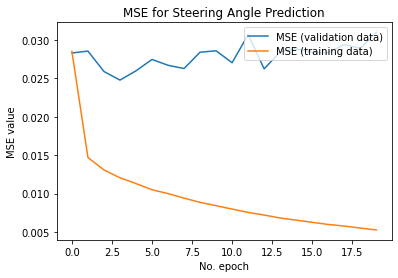

In [2]:
md.plot_training("\\JNET-b64-s43-lr4-e20-ns\\history.csv", "\\JNET-b64-s43-lr4-e20-ns\\history.png")

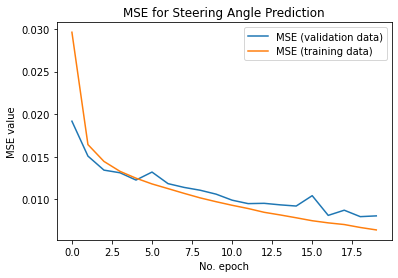

In [3]:
md.plot_training("\\JNET-b64-s43-lr4-e20-ys\\history.csv", "\\JNET-b64-s43-lr4-e20-ys\\history.png")

In [ ]:
md.plot_training("\\SHALLOW\\history.csv", data_path)

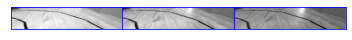

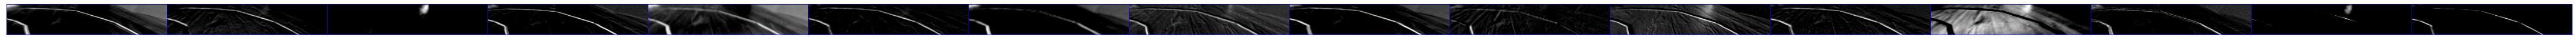

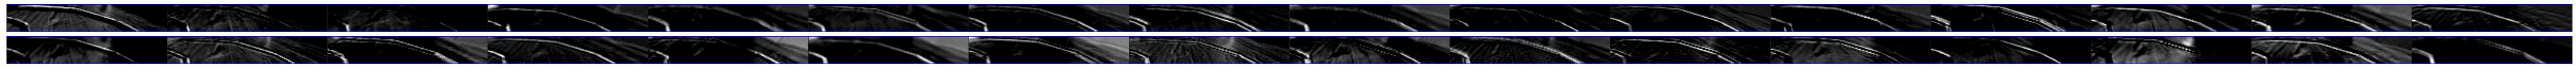

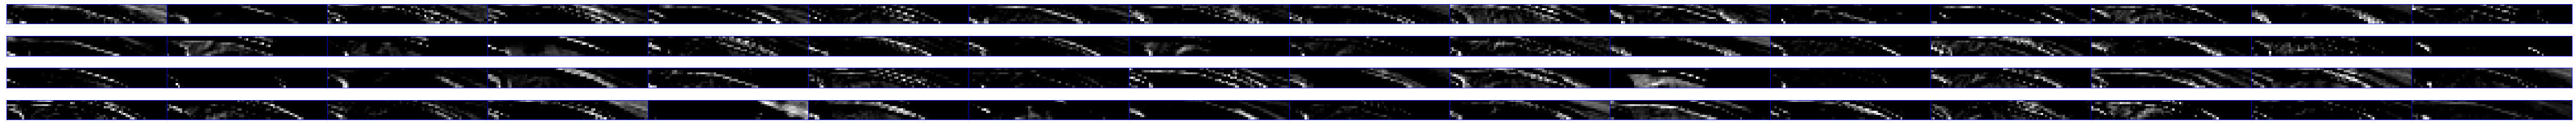

In [10]:
from src.nnetwork.model import plot_feature_maps

jnet_ixs = [2, 3, 5, 7]
jnet_plot_sq = [(1, 3), (1, 16), (2, 16), (4, 16)]
jnet_figsizes = [None, (78, 1), (78, 2), (78, 4)]

plot_feature_maps("\\JNET-b64-s43-lr4-e50", "\\model-049-0.004.h5", "\\2021_01_28_13_02_53_257671_picture_000006199.jpg",
                  jnet_ixs, jnet_plot_sq, jnet_figsizes, data_path)

In [ ]:
from src.nnetwork.model import plot_feature_maps

pilot_ixs = [3, 4, 5, 6, 7]
pilot_plot_sq = [(1, 3), (2, 12), (3, 12), (4, 12), (4, 16)]
pilot_figsizes = [None, (59, 2), (59, 3), (59, 4), (78, 4)]

plot_feature_maps("\\PILOTNET", "\\model-002-0.037.h5", "\\2021_01_28_13_02_53_257671_picture_000006199.jpg",
                  pilot_ixs, pilot_plot_sq, pilot_figsizes, data_path)

In [ ]:
from src.nnetwork.model import plot_feature_maps

shallow_ixs = [2, 3]
shallow_plot_sq = [(1, 3), (2, 8)]
shallow_figsizes = [None, (38, 2)]

plot_feature_maps("\\SHALLOW", "\\model-005-0.044.h5", "\\2021_01_28_13_02_53_257671_picture_000006199.jpg",
                  shallow_ixs, shallow_plot_sq, shallow_figsizes, data_path)

Found 608 non-validated image filenames.
MSE: 0.2192861771886281


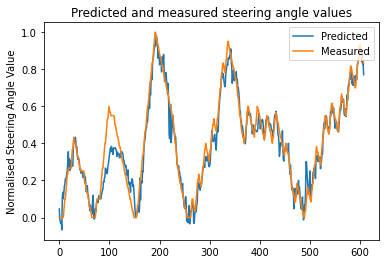

In [3]:
md.evaluate_model("JNET-b64-s43-lr4-e50\\", "model-049-0.004.h5", "output-aug.csv", data_path, batch_size=64, seed=43)